In [1]:
push!(LOAD_PATH, "./")
push!(LOAD_PATH, "../src/")
push!(LOAD_PATH, "./periodicweyl/")
push!(LOAD_PATH, "./src/")

using InBi
using SLutils
using Driver
using Constants
using UsefulFunctions
using LinearAlgebra
using PlotStuff
using SaveStuff
using Dates
#main(params)

#nx = 10; ny = 10; nz = 10; 
nx = 100; ny = 1; nz = 1; 
#nx = 12; ny = 1; nz = 1; 
# superlattice basis vectors, in basis of a_1, a_2, a_3
SL1 = [nx; 0; 0]; SL2 = [0; ny; 0]; SL3 = [0; 0; nz]

saving = true;
runparams = (

             # fermi energy, σ of background disorder
             μ = 0.0*eV, μ_disorder = 0.0*eV, 
             
             # energy range for transport 
             E_samples = [0.1],
             nk = 40, # half of brillouin zone used in transport
             
             # info for saving output of runs
             path = "../outputs/testrunstacc/" * Dates.format(Dates.now(), "e-dd-u-yyyy--HH.MM.SS/"), savedata=false, save=false,
             
             # exchange splitting, name of field pattern, A or β (vector pot or exchange), finite-time broadenings
             β = 0.25*eV, runtype = "blochlattice", fieldtype = "β", η = 5*10^-4, ηD = 5*10^-4, 
             
             # run parameters`
             parallel="k", n_BLAS=1, transport=true, verbose = false, plotfield = true, bands=false, mixedDOS=true, θ=30.0, sweep="none",
             # things to return from driver
             returnvals = ["transmission","tplot","mixedDOS","plotfield"],
             # materials used in the device
             electrodeMagnetization=true,electrodeMaterial="weyl",
             deviceMagnetization=true,deviceMaterial="weyl",
             
             # if defining stripe domain superlattice       # penetration depth 
             #startDWs = -6*nm,
             startDWs = 36*nm, 
             DWwidth = 9*nm, DWspacing = 15*nm, λ = 2*nm,
             #startDWs = 30*nm, DWwidth = 3*nm, DWspacing = 10*nm, 
             # if using proximity-magnetized profile
             #electrodeMagnetization=true,electrodeMaterial="mtjweyl",
             #deviceMagnetization=false,deviceMaterial="ins",
             # will prune periodic boundaries in "x","y","z"
             prune=[]
            )

parms = merge(params,runparams)
p = genSL(parms, nx, ny, nz, SL1, SL3, SL3, parms.runtype, parms.fieldtype) # generate SL params

BLAS.set_num_threads(p.n_BLAS)

function runFieldTexture(p::NamedTuple)
    if(p.fieldtype=="A")
            A = Agen(p,p.runtype,10^8*4*μₑ)
    else
            A = βgen(p,p.runtype,p.β,p.θ,p.startDWs)
    end
    return main(p,A)
end

function nxtoArg(nx::Int)
    SL1 = [nx; 0; 0]
    return genSL(parms, nx, ny, nz, SL1, SL3, SL3, parms.runtype, parms.fieldtype) # generate SL params
end

function startDWstoArg(startDWs::Float64)
    return merge(p, (sweep = "T(Stripe Domain Position,E)", startDWs = startDWs, path = p.path*"startdw=$(round(startDWs*10^9,sigdigits=3))/"))
end

function θtoArg(θ::Float64)
    return merge(p, (sweep = "T(DW angle,E)", θ = θ))
end


#mkpath(p.path)

# for recreating WMTJ
#WMTJparams = nxtoArg(3); WMTJparams = merge(WMTJparams, (electrodeMagnetization=true,electrodeMaterial="mtjweyl", deviceMagnetization=false,deviceMaterial="ins"));
#@time runFieldTexture(WMTJparams)

# for recreating araki hamiltonian
#bandsp = nxtoArg(20); bandsp = merge(bandsp, (startDWs=10*nm, bands=true, parallel="k", DWspacing=30*nm));
#@time runFieldTexture(bandsp)
#bandsp = nxtoArg(50); bandsp = merge(bandsp, (runtype="blochlattice", parallel="k"));

# Get the bands for the supercell
#bandsp = nxtoArg(Int(round(2.5*p.DWspacing/InBi.a,sigdigits=2))); bandsp = merge(bandsp, (bands=true, parallel="k"));
#@time runFieldTexture(bandsp)


#=
(x,y, fig) = Sweep1DSurf(runFieldTexture,startDWstoArg,[DWstart for DWstart = -1.0*p.DWwidth:(3*nm):(p.SLa₁[1] - 2*p.DWwidth)],p.E_samples,"Stripe DW start position (nm)", "Energy (eV)","T (e²/h)",(1/nm),false, p.parallel)
SavePlots(fig,p.path,"transmissionsweep")

mkdelim(p.path*"blochdwsweep.txt",[x y])
=#

#Sweep1DSurf(runFieldTexture,θtoArg,[θ for θ = 0:10.0:180],p.E_samples,"θ DW angle (degrees)", "Energy (eV)", "T (e²/h)")
#(x,y) = Sweep1DSurf(runFieldTexture,startDWstoArg,[DWstart for DWstart = 2*p.DWwidth:(4*nm):4*p.DWwidth],p.E_samples,"Stripe DW start position (nm)", "Energy (eV)","T (e²/h)",(1/nm),false)

#Sweep1DSurf((T -> log10.(T))∘runFieldTexture,startDWstoArg,[DWstart for DWstart = -5*nm:(5*nm):(30*nm)],p.E_samples,"Stripe DW start position (nm)", "Energy (eV)","T (e²/h)",(1/nm),false)
#Sweep1DSurf((T -> log10.(T))∘runFieldTexture,θtoArg,[θ for θ = 0.0:10.0:180.0],p.E_samples,"θ DW angle (degrees)", "Energy (eV)","log₁₀(T) (e²/h)",false)



┌ Info: Precompiling InBi [top-level]
└ @ Base loading.jl:1662
┌ Warning: Module InBi with build ID 10158320099974 is missing from the cache.
│ This may mean InBi [top-level] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325


WebIO._IJuliaInit()

runtype = blochlattice


θtoArg (generic function with 1 method)

runtype = blochlattice
=========== MWSM devices ==============
performing: none
============= NEGF transport ============


(t = 1.0, t₁ = 0.1, t₂ = 0.4, t₃ = 0.2, t₄ = 0, t₅ = 0.0, t₆ = 0.0, t₇ = 0.0, t₈ = 0.1, t₉ = 0.0, vf = 1000000, η = 0.0005, ε = 0.0, ϵ₁ = 2.0, a₁ = [1.0e-9, 0.0, 0.0], a₂ = [0.0, 1.0e-9, 0.0], a₃ = [0.0, 0.0, 1.0e-9], A = [3.0000000000000004e-9 0.0 0.0; 0.0 1.0e-9 0.0; 0.0 0.0 1.0e-9], a = 1.0e-9, b = 1.0e-9, c = 1.0e-9, SLa₁ = [3.0000000000000004e-9, 0.0, 0.0], SLa₂ = [0.0, 1.0e-9, 0.0], SLa₃ = [0.0, 0.0, 1.0e-9], nx = 3, ny = 1, nz = 1, n = 3, norb = 2, nsite = 1, kdict = Dict{String, Vector}("Z" => [0.0, 0.0, 3.1415926535897927e9], "-X₂" => [0.0, -3.1415926535897927e9, 0.0], "-X₃" => [0.0, 0.0, -3.1415926535897927e9], "Γ + 10*iX₁" => ComplexF64[0.0 + 1.0471975511965977e10im, 0.0 + 0.0im, 0.0 + 0.0im], "M" => [1.0471975511965977e9, 3.1415926535897927e9, 0.0], "-Z" => [0.0, 0.0, -3.1415926535897927e9], "X₂" => [0.0, 3.1415926535897927e9, 0.0], "A" => [1.0471975511965977e9, 3.1415926535897927e9, 3.1415926535897927e9], "X₁" => [1.0471975511965977e9, 0.0, 0.0], "Γ + iX₁" => ComplexF64[0.

Applying magnetization profile...
Great, SCF converged. Returning H(k).

returning from SCF
Generating self-energy matrices for electrodes...
Defining Gʳ, Current operator, etc...
Evaluating DOS over brillouin zone, may take a while
Running fermi surface over 501 x 501 k-grid
99.9% = 0.4249014227669839, 99.5% = 0.03788795866411976, 99.0% = 0.020110959451912182, 97% = 0.007941159419896093
Sweeping transmission over kgrid: 1, 81, 81 ...
Done!

167.322477 seconds (660.82 M allocations: 107.254 GiB, 7.93% gc time, 44.62% compilation time: 11% of which was recompilation)


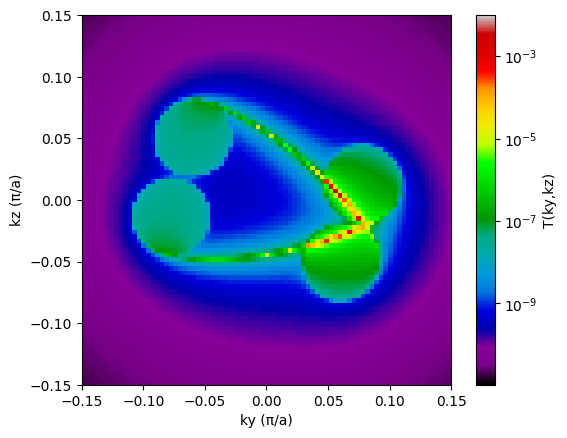

3-element Vector{Any}:
 Figure()
 PyObject <matplotlib.image.AxesImage object at 0x7fafb30840a0>
 [2.6727939129873014e-8]

In [2]:
WMTJparams = nxtoArg(3); WMTJparams = merge(WMTJparams, 
(electrodeMagnetization=true,electrodeMaterial="mtjweyl", deviceMagnetization=false,deviceMaterial="ins"));
@time returns = runFieldTexture(WMTJparams)
returns

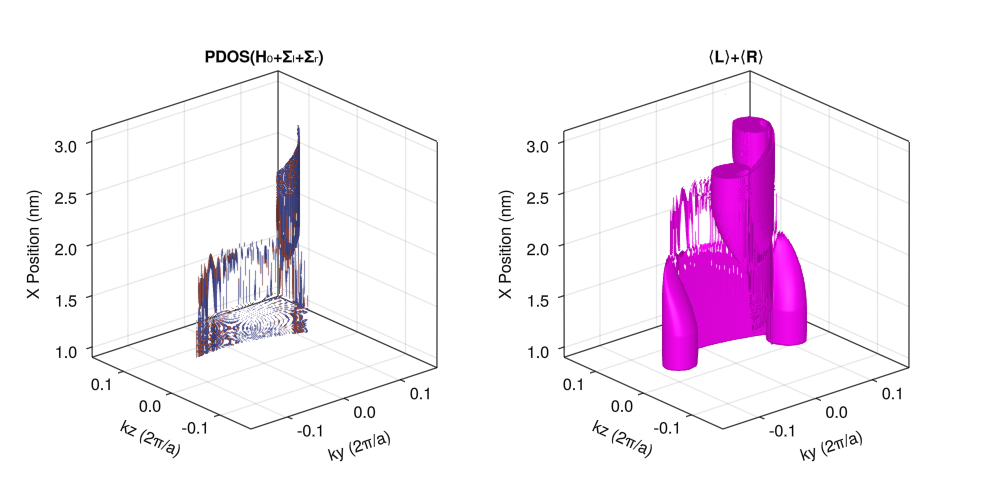

In [6]:
returns[1]

runtype = blochlattice
=========== MWSM devices ==============
performing: none
============= NEGF transport ============


(t = 1.0, t₁ = 0.1, t₂ = 0.4, t₃ = 0.2, t₄ = 0, t₅ = 0.0, t₆ = 0.0, t₇ = 0.0, t₈ = 0.1, t₉ = 0.0, vf = 1000000, η = 0.0005, ε = 0.0, ϵ₁ = 2.0, a₁ = [1.0e-9, 0.0, 0.0], a₂ = [0.0, 1.0e-9, 0.0], a₃ = [0.0, 0.0, 1.0e-9], A = [3.0000000000000004e-8 0.0 0.0; 0.0 1.0e-9 0.0; 0.0 0.0 1.0e-9], a = 1.0e-9, b = 1.0e-9, c = 1.0e-9, SLa₁ = [3.0000000000000004e-8, 0.0, 0.0], SLa₂ = [0.0, 1.0e-9, 0.0], SLa₃ = [0.0, 0.0, 1.0e-9], nx = 30, ny = 1, nz = 1, n = 30, norb = 2, nsite = 1, kdict = Dict{String, Vector}("Z" => [0.0, 0.0, 3.1415926535897927e9], "-X₂" => [0.0, -3.1415926535897927e9, 0.0], "-X₃" => [0.0, 0.0, -3.1415926535897927e9], "Γ + 10*iX₁" => ComplexF64[0.0 + 1.0471975511965976e9im, 0.0 + 0.0im, 0.0 + 0.0im], "M" => [1.0471975511965975e8, 3.1415926535897927e9, 0.0], "-Z" => [0.0, 0.0, -3.1415926535897927e9], "X₂" => [0.0, 3.1415926535897927e9, 0.0], "A" => [1.0471975511965975e8, 3.1415926535897927e9, 3.1415926535897927e9], "X₁" => [1.0471975511965975e8, 0.0, 0.0], "Γ + iX₁" => ComplexF64[0

Applying magnetization profile...
===== Calculating applied zeeman field properties =====
exchange-type field is used, periodicity implied
Rendering 2 Terminal device with magnetization field
Great, SCF converged. Returning H(k).

returning from SCF
Generating self-energy matrices for electrodes...
Defining Gʳ, Current operator, etc...
Evaluating DOS over brillouin zone, may take a while
Running fermi surface over 501 x 501 k-grid
99.9% = 5.186149690846929, 99.5% = 0.9508982155678621, 99.0% = 0.3963948037593751, 97% = 0.10084434131724064
Sweeping transmission over kgrid: 1, 81, 81 ...
Done!

418.303938 seconds (2.34 G allocations: 575.120 GiB, 7.99% gc time, 0.07% compilation time)


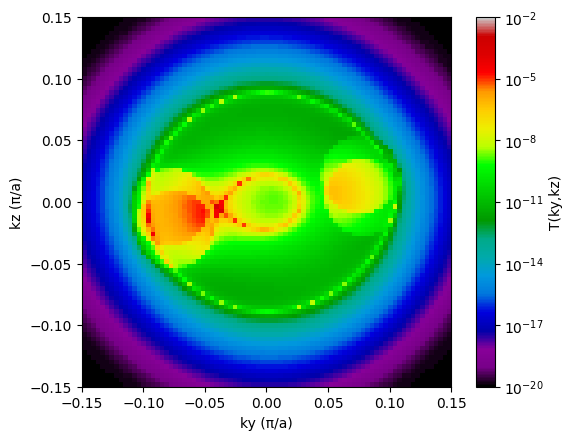

4-element Vector{Any}:
 GLMakie.Screen(...)
 Figure()
 PyObject <matplotlib.image.AxesImage object at 0x7fafb0336800>
 [4.54030054063219e-9]

In [7]:
WRTparams = nxtoArg(30); WRTparams = merge(WRTparams, 
(electrodeMagnetization=true,electrodeMaterial="weyl", deviceMagnetization=true, deviceMaterial="weyl",
runtype = "multiblochdws"), );
@time runFieldTexture(WRTparams)